In [1]:
import discretisedfield as df
import micromagneticmodel as mm
import numpy as np
from numba import njit
import oommfc as oc
from montecarlo.System import Grid, MCDrive

/Users/gmn22/miniconda3/envs/irp/lib/python3.8/site-packages/matplotlib/quiver.py:646: RuntimeWarning: divide by zero encountered in scalar divide
  length = a * (widthu_per_lenu / (self.scale * self.width))
/Users/gmn22/miniconda3/envs/irp/lib/python3.8/site-packages/matplotlib/quiver.py:646: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


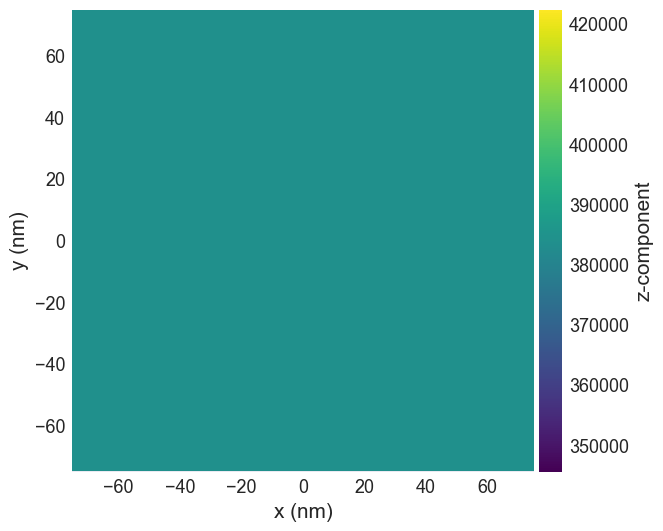

In [2]:
Ms = 3.84e5
A = 8.78e-12

d = 150e-9
hb = 20e-9
ht = 10e-9

cell = (5e-9, 5e-9, 2.5e-9)

subregions = {'r1': df.Region(p1=(-d/2, -d/2, -hb), p2=(d/2, d/2, 0)), 'r2': df.Region(p1=(-d/2, -d/2, 0), p2=(d/2, d/2, ht))}

p1 = (-d/2, -d/2, -hb)
p2 = (d/2, d/2, ht)

mesh = df.Mesh(p1=p1, p2=p2, cell=cell, subregions=subregions)

def Ms_fun(point):
    x, y, z = point
    if x**2 + y**2 < (d/2)**2:
        return Ms
    else:
        return 0

system = mm.System(name='bloch_point')

D_bloch = {'r1': -1.58e-3, 'r2': 1.58e-3, "r1:r2": 1.58e-9}

system.energy = mm.Exchange(A=A) + mm.DMI(D=D_bloch, crystalclass='T')
system.m = df.Field(mesh, dim=3, value=(0, 0, 1), norm=Ms)

system.m.plane('z').mpl()

In [3]:
# uc = oc.MinDriver()
# uc.drive(system)

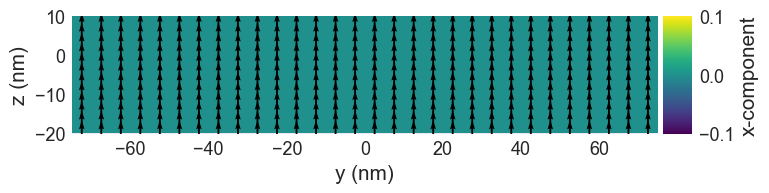

In [4]:
system.m.plane('x').mpl()

In [5]:
regions = {'r1': (-hb, 0), 'r1:r2':  (0, 0), 'r2': (0, ht)}

In [6]:
data = Grid(system=system, Ms=Ms, regions=regions)

In [7]:
print(Ms)
print(data.zeeman_K)
print(data.anisotropic_K)
print(data.anisotropic_u)
print(data.exchange_A)
print(data.dmi_D.shape)
print(data.dx, data.dy, data.dz)
print(data.grid[15, 15, 6])

384000.0
None
None
None
8.78e-12
(32, 32, 14)
5e-09 5e-09 2.5e-09
[0. 0. 1.]


In [8]:
print(data.zeeman_energy())
print(data.anisotropic_energy())
print(data.exchange_energy())
print(data.dmi_energy())

0
0
-0.0
0.0


In [9]:
#  def __init__(self, grid: Grid, energy_func: str='1', schedule_name: str=None, schedule: dict=None)
mc = MCDrive(data, '1')

In [13]:
mc.Drive(N=40000000)

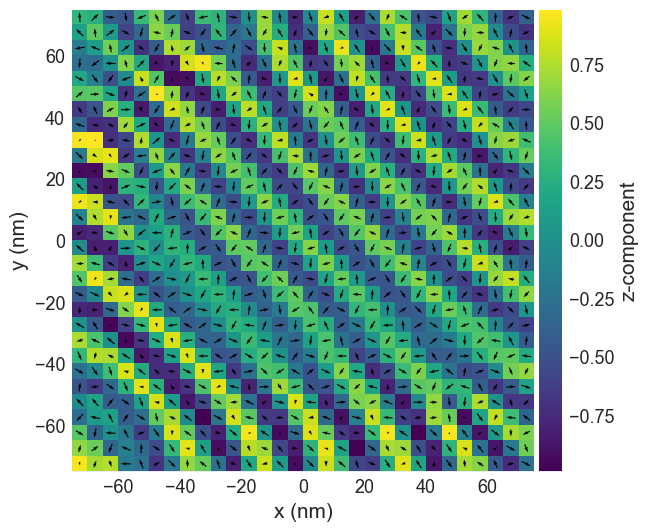

In [15]:
mc.grid.system.m.plane('z').mpl()